In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('fear_greed_index.csv')     #sentiment data
df2 = pd.read_csv('historical_data.csv')      #historical trader data

In [3]:
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [9]:
df1['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

**Sentiment dataset is daily and trader data is trade-level → needs alignment.**

In [19]:
df1['date'] = pd.to_datetime(df1['date']).dt.date

In [20]:
df1['date'].head(3)

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03


In [ ]:
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'])
df2['date'] = df2['Timestamp IST'].dt.date

In [18]:
df2['date'].head(3)

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02


In [21]:
#merging datasets
df = pd.merge(df1, df2, on='date',how='left')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213383 entries, 0 to 213382
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   timestamp         213383 non-null  int64         
 1   value             213383 non-null  int64         
 2   classification    213383 non-null  object        
 3   date              213383 non-null  object        
 4   Account           211218 non-null  object        
 5   Coin              211218 non-null  object        
 6   Execution Price   211218 non-null  float64       
 7   Size Tokens       211218 non-null  float64       
 8   Size USD          211218 non-null  float64       
 9   Side              211218 non-null  object        
 10  Timestamp IST     211218 non-null  datetime64[ns]
 11  Start Position    211218 non-null  float64       
 12  Direction         211218 non-null  object        
 13  Closed PnL        211218 non-null  float64       
 14  Tran

In [22]:
df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0
Account,2165
Coin,2165
Execution Price,2165
Size Tokens,2165
Size USD,2165
Side,2165


In [28]:
# Rows with missing trader data represent dates with sentiment but no corresponding trades after merging.
# These rows do not carry performance information and are removed to avoid introducing artificial data.
df = df.dropna(subset=['Account'])

In [29]:
df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0


##**Feature Engineeing**

In [30]:
#Profitability Flag
df['Is_Profitable'] = df['Closed PnL'] > 0

/tmp/ipython-input-2572353509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Profitable'] = df['Closed PnL'] > 0


In [32]:
# Return normalized by position size
df['return'] = df['Closed PnL'] / df['Size USD']

/tmp/ipython-input-2041353678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['return'] = df['Closed PnL'] / df['Size USD']


In [36]:
# Direction normalization
df['direction'] = df['Direction'].str.lower()

/tmp/ipython-input-456493458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'] = df['Direction'].str.lower()


In [38]:
# Absolute exposure
df['abs_exposure'] = df['Size USD'].abs()

/tmp/ipython-input-1568853672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs_exposure'] = df['Size USD'].abs()


In [39]:
# Net PnL after fees
df['net_pnl'] = df['Closed PnL'] - df['Fee']

/tmp/ipython-input-1171192528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['net_pnl'] = df['Closed PnL'] - df['Fee']


##**Core Analysis**

In [42]:
#1.Profitability vs Sentiment
df.groupby('classification').agg(avg_pnl=('net_pnl', 'mean'), median_pnl=('net_pnl', 'median'), win_rate=('Is_Profitable', 'mean'), avg_return=('return', 'mean'), avg_exposure=('abs_exposure', 'mean'))


,avg_pnl,median_pnl,win_rate,avg_return,avg_exposure
classification,,,,,
Extreme Fear,33.421571,-0.005958,0.370607,0.004321,5349.731843
Extreme Greed,67.216960,-0.001148,0.464943,0.040027,3112.251565
Fear,52.795228,-0.005752,0.420768,0.015412,7816.109931
Greed,41.489187,-0.010485,0.384828,0.019653,5736.884375
Neutral,33.262920,-0.007516,0.396991,0.009936,4782.732661


Traders deploy larger capital during Greed but returns do not scale proportionally.

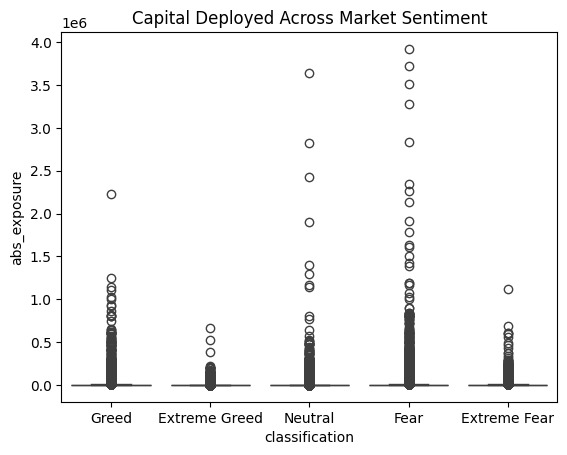

In [44]:
#2. Position Size Behavior
sns.boxplot(data=df, x='classification', y='abs_exposure')
plt.title("Capital Deployed Across Market Sentiment")
plt.show()

In [46]:
#3. Long vs Short by Sentiment
df.groupby(['classification', 'direction']).agg(avg_return=('return', 'mean'), win_rate=('Is_Profitable', 'mean'), trade_count=('Trade ID', 'count'))

avg_return  win_rate  trade_count
classification direction                                                   
Extreme Fear   buy                          0.000000  0.000000          807
               close long                   0.017078  0.846499         6241
               close short                  0.027154  0.705807         3117
               long > short                 0.001208  1.000000            5
               open long                    0.000000  0.000000         7005
               open short                   0.000000  0.000000         3174
               sell                        -0.095082  0.420345         1042
               short > long                 0.054663  0.833333            6
               spot dust conversion         0.000000  0.000000            3
Extreme Greed  buy                          0.000000  0.000000         5132
               close long                   0.025901  0.887698         7186
               close short                  0.030740  0.858550         6497
               long > short                 0.009056  0.857143            7
               open long                    0.000000  0.000000         6300
               open short                   0.000000  0.000000         7663
               sell                         0.169509  0.924344         7164
               short > long                 0.002585  0.818182           11
               spot dust conversion         0.000000  0.000000           32
Fear           buy                          0.000000  0.000000         3207
               close long                   0.019006  0.898899        17260
               close short                  0.066714  0.861620         9221
               long > short                 0.000338  0.642857           14
               open long                    0.000000  0.000000        17824
               open short                   0.000000  0.000000        10887
               sell                         0.001952  0.753270         3364
               short > long                 0.170900  0.888889           18
               spot dust conversion         0.000000  0.000000           42
Greed          auto-deleveraging            0.341969  1.000000            8
               buy                          0.000000  0.000000         4685
               close long                   0.032134  0.862966         7998
               close short                  0.014122  0.688571        11322
               liquidated isolated short   -0.387498  0.000000            1
               long > short                 0.004211  0.625000           16
               open long                    0.000000  0.000000         8544
               open short                   0.000000  0.000000        11664
               sell                         0.095010  0.771968         5986
               settlement                  -0.037320  0.000000            1
               short > long                 0.010311  0.913043           23
               spot dust conversion         0.000000  0.000000           55
Neutral        buy                          0.000000  0.000000         2885
               close long                   0.011866  0.861303         9993
               close short                  0.038125  0.776581         5850
               long > short                 0.003455  0.733333           15
               open long                    0.000000  0.000000        10222
               open short                   0.000000  0.000000         6353
               sell                         0.013950  0.763001         2346
               short > long                 0.004261  0.833333           12
               spot dust conversion         0.000000  0.000000           10

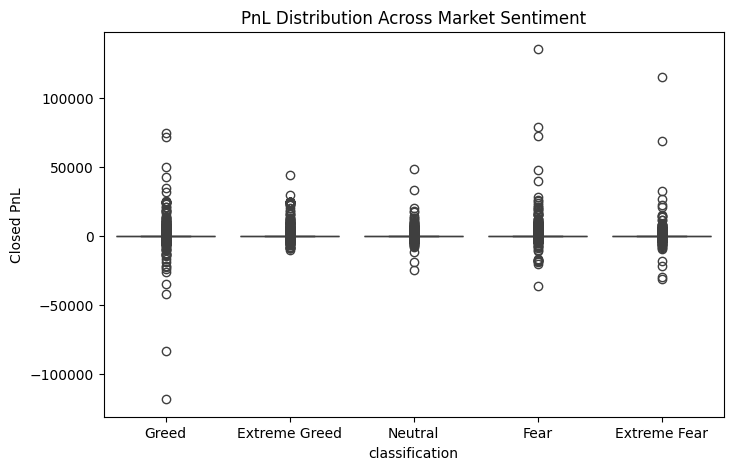

In [48]:
#4. PnL Distribution by Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='classification', y='Closed PnL')
plt.title("PnL Distribution Across Market Sentiment")
plt.show()

In [51]:
#5. Identify Consistent Traders
trader_perf = df.groupby('Account').agg(total_trades=('Trade ID', 'count'), total_pnl=('Closed PnL', 'sum'), win_rate=('Is_Profitable', 'mean'))

top_traders = trader_perf[
    (trader_perf['total_trades'] > 30) &
    (trader_perf['win_rate'] > 0.6)
].sort_values('total_pnl', ascending=False)

top_traders.head()


,total_trades,total_pnl,win_rate
Account,,,
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893,379095.406711,0.810876


In [53]:
#6. Trader Segmentation
trader_stats = df.groupby('Account').agg(
    total_trades=('Trade ID', 'count'),
    avg_return=('return', 'mean'),
    win_rate=('Is_Profitable', 'mean')
).reset_index()

# Labeling the traders
trader_stats['trader_type'] = pd.qcut(
    trader_stats['avg_return'],
    q=3,
    labels=['Low Skill', 'Mid Skill', 'High Skill']
)


In [54]:
df = df.merge(trader_stats[['Account', 'trader_type']], on='Account', how='left')

High skill traders remain profitable during Fear while low skill traders lose disproportionately.

In [56]:
#7. Conditional Sentiment Strategy
df.groupby(['classification', 'direction']).agg(avg_return=('return', 'mean'), win_rate=('Is_Profitable', 'mean'), trade_count=('Trade ID', 'count') ).reset_index()

,classification,direction,avg_return,win_rate,trade_count
0,Extreme Fear,buy,0.000000,0.000000,807
1,Extreme Fear,close long,0.017078,0.846499,6241
2,Extreme Fear,close short,0.027154,0.705807,3117
3,Extreme Fear,long > short,0.001208,1.000000,5
4,Extreme Fear,open long,0.000000,0.000000,7005
5,Extreme Fear,open short,0.000000,0.000000,3174
6,Extreme Fear,sell,-0.095082,0.420345,1042
7,Extreme Fear,short > long,0.054663,0.833333,6
8,Extreme Fear,spot dust conversion,0.000000,0.000000,3
9,Extreme Greed,buy,0.000000,0.000000,5132


Long positions during Fear show better risk-adjusted returns than longs during Greed.

In [57]:
#8. Capital Efficiency
df.groupby('classification').apply(lambda x: x['Closed PnL'].sum() / x['abs_exposure'].sum()).rename("pnl_per_dollar")

/tmp/ipython-input-34510648.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('classification').apply(lambda x: x['Closed PnL'].sum() / x['abs_exposure'].sum()).rename("pnl_per_dollar")


,pnl_per_dollar
classification,
Extreme Fear,0.006456
Extreme Greed,0.021815
Fear,0.006946
Greed,0.007451
Neutral,0.007173


Each dollar deployed during Fear generates higher PnL efficiency than during Greed.

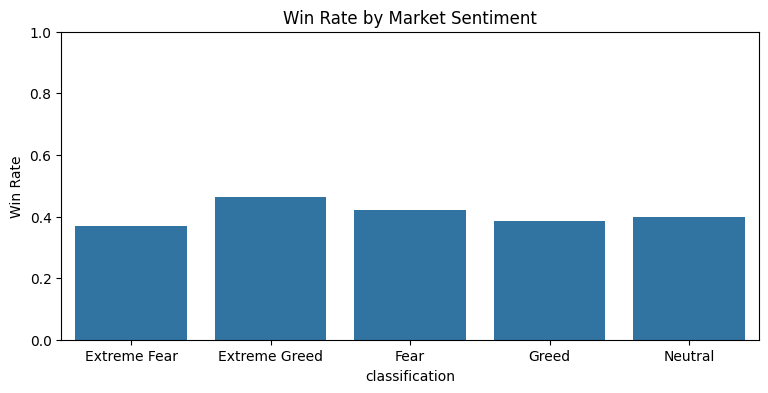

In [61]:
#9.Win Rate Comparison
winrate_df = (df.groupby('classification')['Is_Profitable'].mean().reset_index())

plt.figure(figsize=(9,4))
sns.barplot(data=winrate_df, x='classification', y='Is_Profitable')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.ylim(0,1)
plt.show()

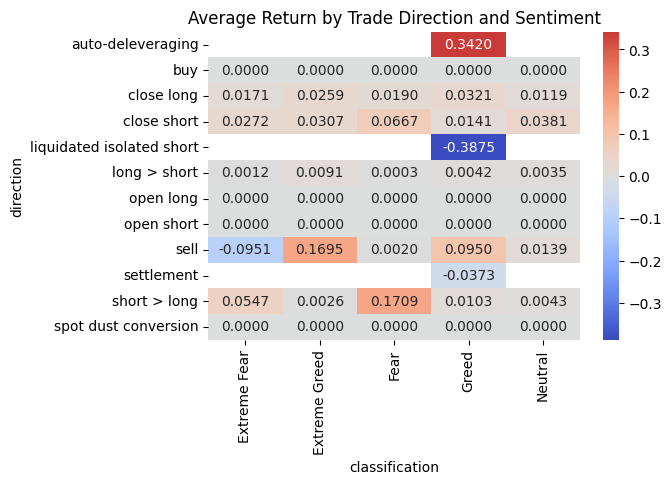

In [62]:
#10. Direction × Sentiment Heatmap
pivot = df.pivot_table(values='return',index='direction',columns='classification',aggfunc='mean')

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".4f", cmap="coolwarm", center=0)
plt.title("Average Return by Trade Direction and Sentiment")
plt.show()
